Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/CNN_assignment/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/CNN_assignment/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2238
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
7## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2238 files belonging to 9 classes.
Using 1791 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2238 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

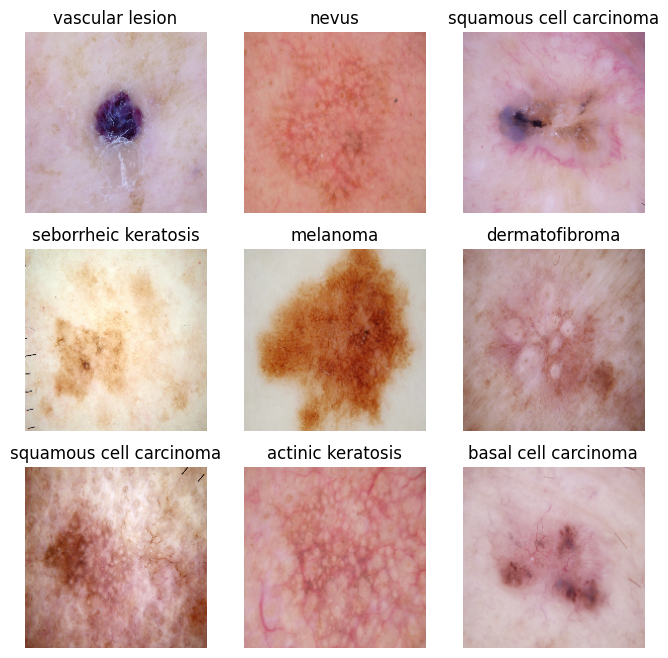

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [23]:
### Your code goes here
num_classes =9

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation ='softmax')) # number of classes 

## Number of classes is 9
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_21 (ModuleWr  (None, 178, 178, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_22 (ModuleWr  (None, 176, 176, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_23 (ModuleWr  (None, 88, 88, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_24 (ModuleWr  (None, 88, 88, 64)       18496     
 apper)                                               

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [28]:
### Todo, choose an appropirate optimiser and loss function
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [29]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_21 (ModuleWr  (None, 178, 178, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_22 (ModuleWr  (None, 176, 176, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_23 (ModuleWr  (None, 88, 88, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_24 (ModuleWr  (None, 88, 88, 64)       18496     
 apper)                                               

### Train the model

In [30]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 47s 814ms/step - loss: 2.2331 - accuracy: 0.2200 - val_loss: 1.9408 - val_accuracy: 0.2573
Epoch 2/20
56/56 [==============================] - 3s 59ms/step - loss: 1.8988 - accuracy: 0.2808 - val_loss: 1.9225 - val_accuracy: 0.2595
Epoch 3/20
56/56 [==============================] - 3s 61ms/step - loss: 1.7396 - accuracy: 0.3802 - val_loss: 1.6095 - val_accuracy: 0.4407
Epoch 4/20
56/56 [==============================] - 3s 60ms/step - loss: 1.4849 - accuracy: 0.4913 - val_loss: 1.4143 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.3950 - accuracy: 0.5187 - val_loss: 1.3689 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 3s 61ms/step - loss: 1.2874 - accuracy: 0.5505 - val_loss: 1.5222 - val_accuracy: 0.4139
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.2361 - accuracy: 0.5533 - val_loss: 1.5027 - val_accuracy: 0.4720
Epoch 8/20


### Visualizing training results

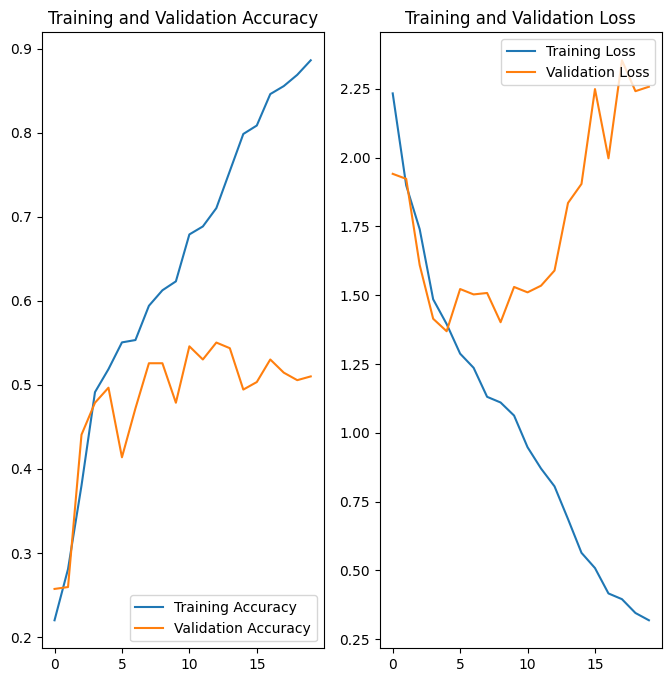

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



*   Based on the a above visuals, we can clearly see an evidence of overfitting in the model
*   The model has a training accuracy of 83% , while test accuracy is just 47%
* Also, we can see that the validation loss is very high compared to training loss confirming overfitting


### Write your findings here

In [32]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array,array_to_img

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


classes =['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

train_generator = datagen.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = classes,
    batch_size = 32
 )

valid_generator = datagen.flow_from_directory(data_dir_test, 
    target_size = (180,180),
    classes = classes,
    batch_size = 32
)


Found 2238 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


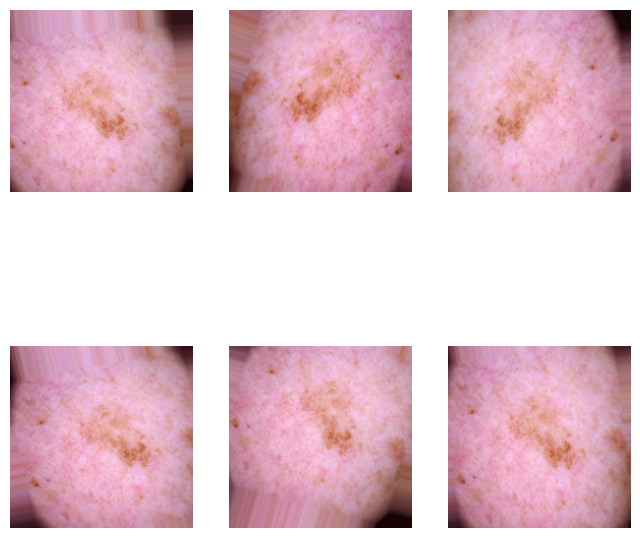

In [13]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

for images, labels in train_ds.take(1):
  img =images[0]

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate augmented images from the input image using the datagen.flow() method
i = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
for batch in datagen.flow(x, batch_size=1):
    # Convert the augmented image batch to a PIL image
    img = array_to_img(batch[0], scale=True)

    # Plot the augmented image
    row = i // 3
    col = i % 3
    ax[row][col].imshow(img)
    ax[row][col].axis('off')
    i += 1

    # Break the loop if we have plotted 6 augmented images
    if i == 6:
        break

plt.show()

### Todo:
### Create the model, compile and train the model


In [33]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
### Your code goes here
num_classes =9

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax')) # number of classes 

## Number of classes is 9
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_31 (ModuleWr  (None, 178, 178, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (None, 176, 176, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_33 (ModuleWr  (None, 88, 88, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_34 (ModuleWr  (None, 88, 88, 64)       18496     
 apper)                                               

### Compiling the model

In [34]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_31 (ModuleWr  (None, 178, 178, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (None, 176, 176, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_33 (ModuleWr  (None, 88, 88, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_34 (ModuleWr  (None, 88, 88, 64)       18496     
 apper)                                               

### Training the model

In [35]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 127s 2s/step - loss: 2.0444 - accuracy: 0.2386 - val_loss: 2.2778 - val_accuracy: 0.1949
Epoch 2/20
70/70 [==============================] - 75s 1s/step - loss: 1.7965 - accuracy: 0.3378 - val_loss: 2.3082 - val_accuracy: 0.2203
Epoch 3/20
70/70 [==============================] - 77s 1s/step - loss: 1.7133 - accuracy: 0.3914 - val_loss: 2.1662 - val_accuracy: 0.2288
Epoch 4/20
70/70 [==============================] - 74s 1s/step - loss: 1.6478 - accuracy: 0.3950 - val_loss: 2.2267 - val_accuracy: 0.3475
Epoch 5/20
70/70 [==============================] - 75s 1s/step - loss: 1.5931 - accuracy: 0.4424 - val_loss: 2.3209 - val_accuracy: 0.2119
Epoch 6/20
70/70 [==============================] - 73s 1s/step - loss: 1.5242 - accuracy: 0.4665 - val_loss: 2.0757 - val_accuracy: 0.3475
Epoch 7/20
70/70 [==============================] - 74s 1s/step - loss: 1.4367 - accuracy: 0.5063 - val_loss: 2.2638 - val_accuracy: 0.3559
Epoch 8/20
70/70 [=

### Visualizing the results

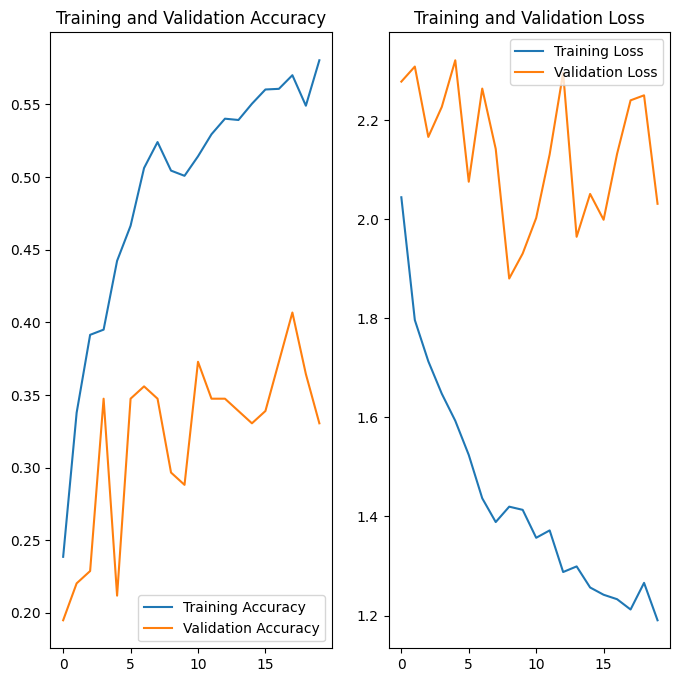

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

* After adding the data augmentation strategy and dropout layer the accuracy of train data set has reduced to 58%
* The overfitting in the model has decreased, considering the difference in train and validation dataset has decreased
* The model is now underfitting though

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [9]:
## Your code goes here.
class_names =['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
for i in class_names:
    directory =str(data_dir_train)+'/'+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 356 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

- seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?

- pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [10]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [39]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7A2C104AC0>: 100%|██████████| 500/500 [00:25<00:00, 19.44 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7A200EA530>: 100%|██████████| 500/500 [00:28<00:00, 17.48 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7A2C171300>: 100%|██████████| 500/500 [00:29<00:00, 17.16 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7A24D95630>: 100%|██████████| 500/500 [01:50<00:00,  4.53 Samples/s]


Initialised with 356 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x7F7A2C1B3C10>: 100%|██████████| 500/500 [01:51<00:00,  4.49 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7A2C3E16F0>: 100%|██████████| 500/500 [00:22<00:00, 22.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7A2C1732B0>: 100%|██████████| 500/500 [00:52<00:00,  9.44 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7A2C3E1BD0>: 100%|██████████| 500/500 [00:21<00:00, 22.81 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7A2C3EB640>: 100%|██████████| 500/500 [00:23<00:00, 20.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [11]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [12]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_55fed5d1-fe6b-42a9-b172-0c2402ab912d.jpg',
 'gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026212.jpg_2ab6ec3c-9661-4c88-a896-da383f191078.jpg',
 'gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026650.jpg_3935041c-0176-4d8e-a4d7-7117666b10b3.jpg',
 'gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027650.jpg_0af71c66-bfff-41cc-bbad-ff13dcdd80e3.jpg',
 'gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_8d45c102-df98-4702-be93-efd4f63af7b9.jpg',
 'gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030826.jpg_de01d263-23d0-47ce-b959-eada29aea06d.jpg',
 'gdrive/My Drive/CNN_assignment/Train/actinic keratosis/output/actinic keratosis_original_ISI

In [13]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [14]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [15]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [16]:
path_list_orig = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_orig = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [17]:
original_dict = dict(zip(path_list_orig, lesion_list_orig))
original_df = pd.DataFrame(list(original_dict.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,gdrive/My Drive/CNN_assignment/Train/actinic k...,Train
1,gdrive/My Drive/CNN_assignment/Train/actinic k...,Train
2,gdrive/My Drive/CNN_assignment/Train/actinic k...,Train
3,gdrive/My Drive/CNN_assignment/Train/actinic k...,Train
4,gdrive/My Drive/CNN_assignment/Train/actinic k...,Train


In [18]:
new_df = original_df.append(df2)

<ipython-input-18-2ade1842133b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [19]:
new_df['Label'].value_counts()

Train                         2238
actinic keratosis              500
basal cell carcinoma           500
dermatofibroma                 500
melanoma                       500
nevus                          500
pigmented benign keratosis     500
seborrheic keratosis           500
squamous cell carcinoma        500
vascular lesion                500
Name: Label, dtype: int64

In [20]:
new_df['Path'].count()

6738

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [21]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [22]:
data_dir_train =pathlib.Path("gdrive/My Drive/CNN_assignment/Train")

In [23]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6738 files belonging to 9 classes.
Using 5391 files for training.


#### **Todo:** Create a validation dataset

In [24]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6738 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [26]:
## your code goes here
num_classes =9

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu' ))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax')) # number of classes 

## Number of classes is 9
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 88, 88, 64)       18496     
 pper)                                                  

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [27]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 88, 88, 64)       18496     
 pper)                                                  

#### **Todo:**  Train your model

In [28]:
epochs = 30
## Your code goes here, use 50 epochs.
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 793s 1s/step - loss: 1.9341 - accuracy: 0.3408 - val_loss: 2.1495 - val_accuracy: 0.1277
Epoch 2/30
169/169 [==============================] - 11s 62ms/step - loss: 1.4286 - accuracy: 0.4572 - val_loss: 2.0007 - val_accuracy: 0.2339
Epoch 3/30
169/169 [==============================] - 11s 63ms/step - loss: 1.2883 - accuracy: 0.5194 - val_loss: 2.0184 - val_accuracy: 0.3081
Epoch 4/30
169/169 [==============================] - 11s 63ms/step - loss: 1.1547 - accuracy: 0.5776 - val_loss: 1.8130 - val_accuracy: 0.3259
Epoch 5/30
169/169 [==============================] - 11s 66ms/step - loss: 1.0442 - accuracy: 0.6160 - val_loss: 1.6064 - val_accuracy: 0.4447
Epoch 6/30
169/169 [==============================] - 11s 64ms/step - loss: 0.8600 - accuracy: 0.6824 - val_loss: 2.3918 - val_accuracy: 0.3950
Epoch 7/30
169/169 [==============================] - 11s 64ms/step - loss: 0.7586 - accuracy: 0.7186 - val_loss: 1.4618 - val_accuracy: 

#### **Todo:**  Visualize the model results

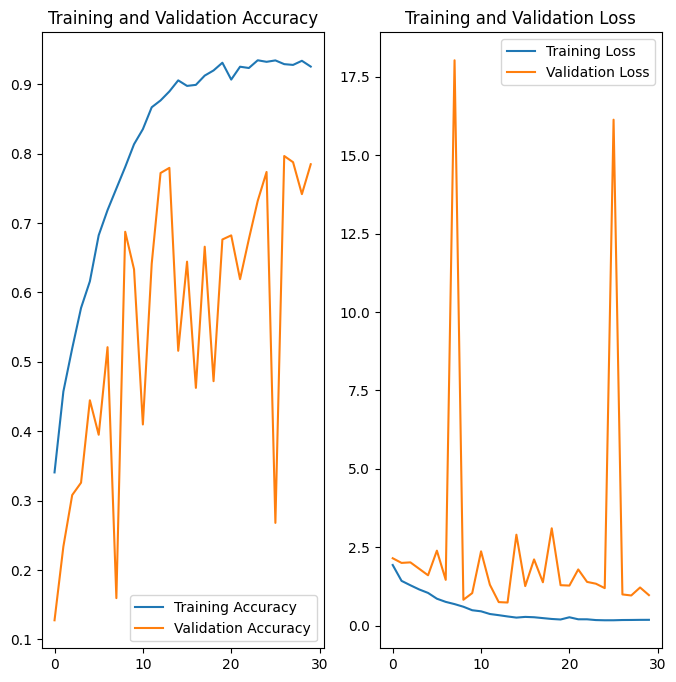

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



* Yes, We are able to get rid of overfitting to a great extent now!
* Now there's is not a huge difference between training and test accuracy and the model performance is also good
* Also, the final validation loss is also not very high
* We have achieved a good model with an accuracy of 78%
* Data Augumentation, adding samples and regularization techniques